In [2]:
# Import packages, testdata, points, the Y-matrix for the dataset and Functions.py
import numpy as np
%run 1.FB-messages_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [3]:
def LR(x):
    return np.exp(-x/80)*0.01+0.00001

In [4]:
# Define the model parameters
num_samples = 1266
alpha = 2
dim = 12

In [6]:
# The forloop run over one testset, and compute the latent space for the LDM with a prior
for s in range(len(random_numbers_matrix)):
    Y_updated = np.delete(Y, random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 100000002
    grad = 0
    n = 100000
    points_copy_prior = copy.deepcopy(points)
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 1: # stopping criteria TOG 500 MIN MED 100
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy_prior,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy_prior[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        k += 1
    

100000002
-16828492.70315821
12283937.971615555
1684205.1428728304
171132.14695713064
-162843.0824205745
-139310.25145465322
-48692.90226842975
76781.82115645148
152661.78848111117
234992.49243826466
324967.45483171055
379908.7473721071
388449.6560477449
365229.31849073735
313419.44865249924
253877.9033868782
204516.91125996545
170257.63576396648
112766.39514989938
23871.205011095044
2393.055995005496
1964.9424498547305
1797.2124401679903
1653.5237028559131
1523.7554977084656
1405.836830342094
1298.5120909699253
1200.849539128576
1112.0572340743456
1031.4053248138152
958.1930753480119
891.739154406554
831.3847906119663
776.5022265862754
726.5040300223736
680.8508093054952
639.0561535350935
600.6884617110845
565.3698985155152
532.7730628277295
502.6161067276789
474.65703872152335
448.68783845742655
424.52885259516006
402.02377349186645
381.0353516513751
361.44187478851563
343.1343658740534
326.01440695618476
309.9924777085853
294.98669874577536
280.9218816764187
267.7288043737044
255.34

In [162]:
%store points_copy_prior

Stored 'points_copy_prior' (dict)


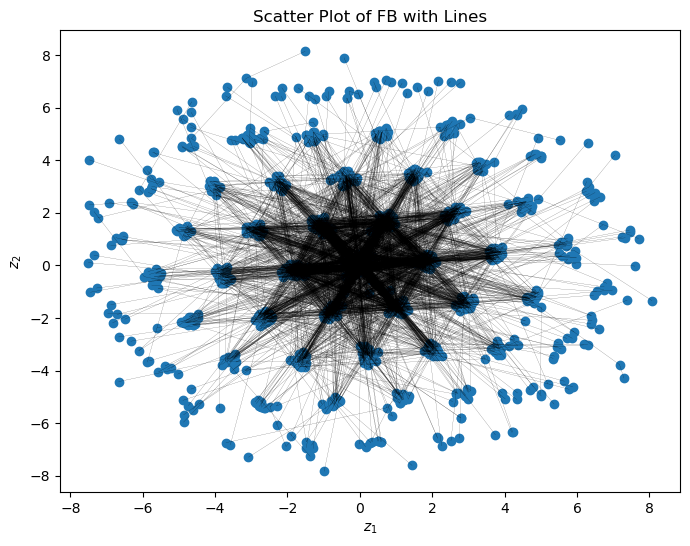

In [180]:
connections = Y[random_numbers_matrix[s].flatten().astype(int), 0]
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy_prior[Y[m][1]]
        point2 = points_copy_prior[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.1) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy_prior.values()]
y = [point[1] for point in points_copy_prior.values()]
plt.scatter(x, y)

plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.title('Scatter Plot of FB with Lines')
plt.show()